In [12]:
import pandas as pd

In [47]:
df = pd.read_csv('panic_attack_dataset.csv')

In [48]:
df.head()

,ID,Age,Gender,Panic_Attack_Frequency,Duration_Minutes,Trigger,Heart_Rate,Sweating,Shortness_of_Breath,Dizziness,...,Trembling,Medical_History,Medication,Caffeine_Intake,Exercise_Frequency,Sleep_Hours,Alcohol_Consumption,Smoking,Therapy,Panic_Score
0,1,56,Female,9,5,Caffeine,134,Yes,No,Yes,...,No,Anxiety,No,2,3,6.4,5,Yes,Yes,5
1,2,46,Male,8,9,Stress,139,Yes,Yes,No,...,No,PTSD,Yes,2,5,5.0,3,No,Yes,7
2,3,32,Female,6,31,PTSD,141,No,Yes,Yes,...,No,Depression,No,4,0,8.3,8,No,Yes,7
3,4,60,Male,5,20,Caffeine,109,Yes,Yes,No,...,Yes,Depression,No,3,3,5.3,8,No,No,1
4,5,25,Non-binary,6,10,Caffeine,101,Yes,No,Yes,...,Yes,Depression,No,3,6,7.2,2,No,No,5


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      1200 non-null   int64  
 1   Age                     1200 non-null   int64  
 2   Gender                  1200 non-null   object 
 3   Panic_Attack_Frequency  1200 non-null   int64  
 4   Duration_Minutes        1200 non-null   int64  
 5   Trigger                 1200 non-null   object 
 6   Heart_Rate              1200 non-null   int64  
 7   Sweating                1200 non-null   object 
 8   Shortness_of_Breath     1200 non-null   object 
 9   Dizziness               1200 non-null   object 
 10  Chest_Pain              1200 non-null   object 
 11  Trembling               1200 non-null   object 
 12  Medical_History         1078 non-null   object 
 13  Medication              1200 non-null   object 
 14  Caffeine_Intake         1200 non-null   

In [50]:
df['Medical_History'].fillna('Unknown', inplace=True)

/tmp/ipykernel_32/605522052.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Medical_History'].fillna('Unknown', inplace=True)


In [51]:
df.drop_duplicates(inplace=True)


In [109]:
df.columns = df.columns.str.lower().str.replace(' ', '_')


In [110]:
df['gender'] = df['gender'].astype('category')
df['trigger'] = df['trigger'].astype('category')


In [111]:
df.isnull().sum()


id                          0
age                         0
gender                      0
panic_attack_frequency      0
duration_minutes            0
trigger                     0
heart_rate                  0
sweating                    0
shortness_of_breath         0
dizziness                   0
chest_pain                  0
trembling                   0
medical_history             0
medication                  0
caffeine_intake             0
exercise_frequency          0
sleep_hours                 0
alcohol_consumption         0
smoking                     0
therapy                     0
panic_score                 0
alcohol_bins              127
alcohol_level             127
has_panic_attack            0
age_group                  29
dtype: int64

In [112]:
df[['panic_score', 'heart_rate', 'duration_minutes']].describe()


,panic_score,heart_rate,duration_minutes
count,1200.000000,1200.000000,1200.00000
mean,5.569167,120.302500,24.39250
std,2.793155,23.369912,11.39993
min,1.000000,80.000000,5.00000
25%,3.000000,100.000000,15.00000
50%,6.000000,121.000000,24.00000
75%,8.000000,141.000000,34.00000
max,10.000000,159.000000,44.00000


In [113]:
import seaborn as sns
import matplotlib.pyplot as plt


In [114]:
df['heart_rate'].max()

159

In [115]:
print(df.columns)


Index(['id', 'age', 'gender', 'panic_attack_frequency', 'duration_minutes',
       'trigger', 'heart_rate', 'sweating', 'shortness_of_breath', 'dizziness',
       'chest_pain', 'trembling', 'medical_history', 'medication',
       'caffeine_intake', 'exercise_frequency', 'sleep_hours',
       'alcohol_consumption', 'smoking', 'therapy', 'panic_score',
       'alcohol_bins', 'alcohol_level', 'has_panic_attack', 'age_group'],
      dtype='object')


In [116]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()


In [117]:
age_with_most_panic_attacks = df.groupby('age')['panic_attack_frequency'].sum().idxmax()
most_panic_attacks = df.groupby('age')['panic_attack_frequency'].sum().max()

print(f"The age with the most panic attacks is {age_with_most_panic_attacks} with {most_panic_attacks} panic attacks.")


The age with the most panic attacks is 64 with 172 panic attacks.


In [118]:
highest_heart_rate_by_trigger = df.groupby('trigger')['heart_rate'].max()
print("Highest Heart Rate by Trigger:")
print(highest_heart_rate_by_trigger)


Highest Heart Rate by Trigger:
trigger
0    159
1    159
2    159
3    159
4    159
5    158
Name: heart_rate, dtype: int64


/tmp/ipykernel_32/475962807.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  highest_heart_rate_by_trigger = df.groupby('trigger')['heart_rate'].max()


In [119]:
num_smokers = df[df['smoking'] == 'Yes'].shape[0]

print(f"There are {num_smokers} smokers in the dataset.")


There are 325 smokers in the dataset.


In [120]:
correlation = df['alcohol_consumption'].corr(df['panic_score'])
print(f"The correlation between alcohol consumption and panic score is: {correlation}")


The correlation between alcohol consumption and panic score is: 0.03892862282136373


In [128]:
bins = [0, 1, 3, 5, 10]
labels = ['Low', 'Moderate', 'High', 'Very High']
df['alcohol_level'] = pd.cut(df['alcohol_consumption'], bins=bins, labels=labels)
grouped_by_alcohol = df.groupby('alcohol_level', observed=True)['panic_score'].mean()
print(grouped_by_alcohol)


alcohol_level
Low          5.250000
Moderate     5.449580
High         5.510730
Very High    5.704255
Name: panic_score, dtype: float64


In [127]:
panic_attacks_by_gender = df.groupby('gender', observed=True)['panic_attack_frequency'].sum()
print(panic_attacks_by_gender)


gender
0    2350
1    2403
2     542
Name: panic_attack_frequency, dtype: int64


In [123]:
gender_with_most_panic_attacks = panic_attacks_by_gender.idxmax()
most_panic_attacks = panic_attacks_by_gender.max()

print(f"The gender with the most panic attacks is {gender_with_most_panic_attacks} with {most_panic_attacks} total panic attacks.")


The gender with the most panic attacks is 1 with 2403 total panic attacks.


In [129]:
df['has_panic_attack'] = df['panic_attack_frequency'] > 0
proportion_with_panic_attack = df.groupby('gender', observed=True)['has_panic_attack'].mean()
print(proportion_with_panic_attack)


gender
0    0.894353
1    0.890130
2    0.885965
Name: has_panic_attack, dtype: float64


In [96]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


In [97]:
# Display the first few rows of the dataset to understand the structure
print(df.head())


   id  age      gender  panic_attack_frequency  duration_minutes   trigger  \
0   1   56      Female                       9                 5  Caffeine   
1   2   46        Male                       8                 9    Stress   
2   3   32      Female                       6                31      PTSD   
3   4   60        Male                       5                20  Caffeine   
4   5   25  Non-binary                       6                10  Caffeine   

   heart_rate sweating shortness_of_breath dizziness  ... exercise_frequency  \
0         134      Yes                  No       Yes  ...                  3   
1         139      Yes                 Yes        No  ...                  5   
2         141       No                 Yes       Yes  ...                  0   
3         109      Yes                 Yes        No  ...                  3   
4         101      Yes                  No       Yes  ...                  6   

  sleep_hours alcohol_consumption smoking  therapy

/tmp/ipykernel_32/1394183282.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=panic_by_age_group.index, y=panic_by_age_group.values, palette=colors, ax=ax)


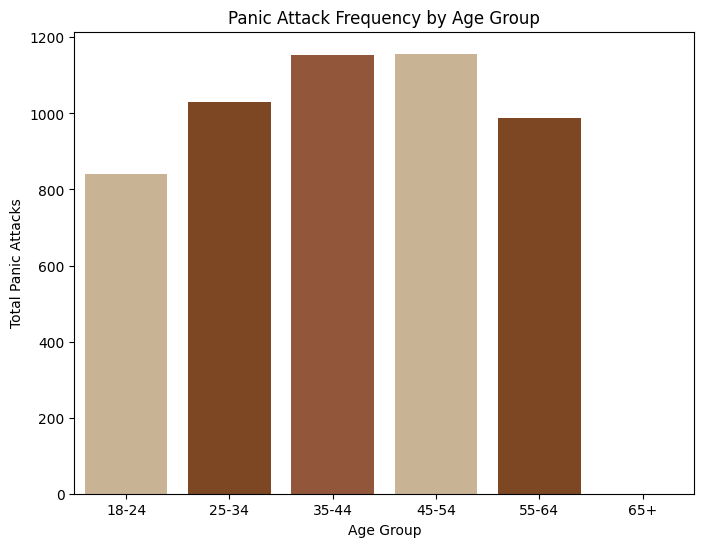

In [132]:
# Here i am setting the age groups for my chart
age_bins = [18, 25, 35, 45, 55, 65, 100]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

# Grouping age groups and the panic attack frequency
panic_by_age_group = df.groupby('age_group', observed=True)['panic_attack_frequency'].sum()

# Swlecting shades for the graph I had to search for these shades
colors = ['#D2B48C', '#8B4513', '#A0522D', '#D2B48C', '#8B4513', '#A0522D'] 

# Setting the background clear for portfolio
fig, ax = plt.subplots(figsize=(8, 6))

#setting the background with a clear and white background
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.5)

# Here i am creating the bar chart plot
sns.barplot(x=panic_by_age_group.index, y=panic_by_age_group.values, palette=colors, ax=ax)

# I am setting the titles with black text
plt.title('Panic Attack Frequency by Age Group', color='black')
plt.xlabel('Age Group', color='black')
plt.ylabel('Total Panic Attacks', color='black')

# Saving the plot with transparen setting
plt.savefig('panic_attack_by_age_group_translucent.png', transparent=True)

#show chart
plt.show()


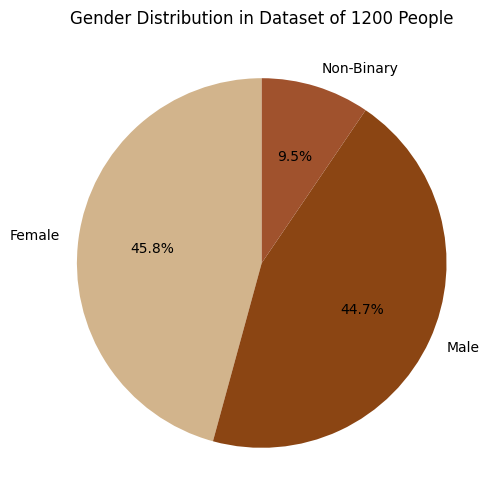

In [102]:

# Here I am working out how many male participants
gender_counts = df['gender'].value_counts()

# Changing labels to string
gender_labels = {0: 'Female', 1: 'Male', 2: 'Non-Binary'}
gender_counts.index = gender_counts.index.map(gender_labels)

# Setting the shades as previous
colors = ['#D2B48C', '#8B4513', '#A0522D']

#Same as before , setting a transparent background
fig, ax = plt.subplots(figsize=(6, 6), facecolor='none')  # Transparent background

# Plot the pie chart with the specified colors
ax.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)

# Title for the chart with black color
plt.title('Gender Distribution in Dataset of 1200 People', color='black')  # Black title for readability

# Remove y-axis label for cleaner presentation
plt.ylabel('')

# Save the figure with a transparent background (for a portfolio page)
plt.savefig('gender_distribution_transparent.png', transparent=True)

# Display the pie chart
plt.show()


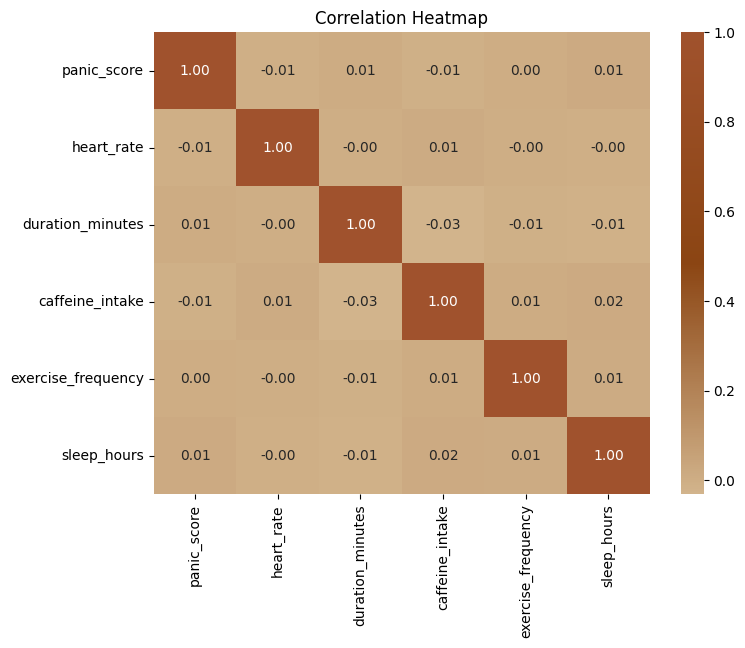

In [103]:
# Compute the correlation matrix for the selected columns
corr_matrix = df[['panic_score', 'heart_rate', 'duration_minutes', 'caffeine_intake', 'exercise_frequency', 'sleep_hours']].corr()

# Defining my shades
brown_colors = ['#D2B48C', '#8B4513', '#A0522D']

# Create a custom colormap using the brown shades
cmap = mcolors.LinearSegmentedColormap.from_list("brown_gradient", brown_colors)


fig, ax = plt.subplots(figsize=(8, 6), facecolor='none')

# Set the translucent background by adjusting alpha for the axes
ax.set_facecolor('white')
ax.patch.set_alpha(0.5)

# Create the heatmap using the custom brown colormap
sns.heatmap(corr_matrix, annot=True, cmap=cmap, fmt='.2f', ax=ax)

# Title and labels with black text
plt.title('Correlation Heatmap', color='black')

# Display the plot
plt.show()


/tmp/ipykernel_32/1252772759.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='alcohol_bins', y='panic_score', data=df, palette=["#D2B48C", "#8B4513", "#A0522D", "#8B4513"], ax=ax)


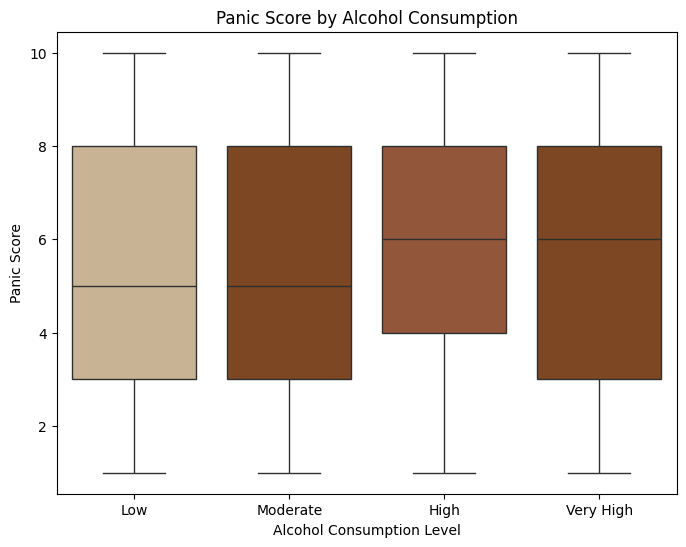

In [104]:
# Categorize alcohol consumption into bins: Low, Moderate, High, Very High
df['alcohol_bins'] = pd.cut(df['alcohol_consumption'], bins=[0, 1, 3, 5, 10], labels=['Low', 'Moderate', 'High', 'Very High'])

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(8, 6), facecolor='none')

# Set the background color for the axis
ax.set_facecolor('white')

# Make the plot background slightly transparent
ax.patch.set_alpha(0.5)

# Create the boxplot with alcohol_bins on the x-axis and panic_score on the y-axis and selecting shades previously used
sns.boxplot(x='alcohol_bins', y='panic_score', data=df, palette=["#D2B48C", "#8B4513", "#A0522D", "#8B4513"], ax=ax)

# Set the title of the plot with black text
plt.title('Panic Score by Alcohol Consumption', color='black')

# Set the x-axis label with black text
plt.xlabel('Alcohol Consumption Level', color='black')

# Set the y-axis label with black text
plt.ylabel('Panic Score', color='black')

# Display the plot
plt.show()


/tmp/ipykernel_32/16156432.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trigger_counts.index, y=trigger_counts.values, palette=brown_shades)
/tmp/ipykernel_32/16156432.py:20: UserWarning: 
The palette list has fewer values (4) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=trigger_counts.index, y=trigger_counts.values, palette=brown_shades)


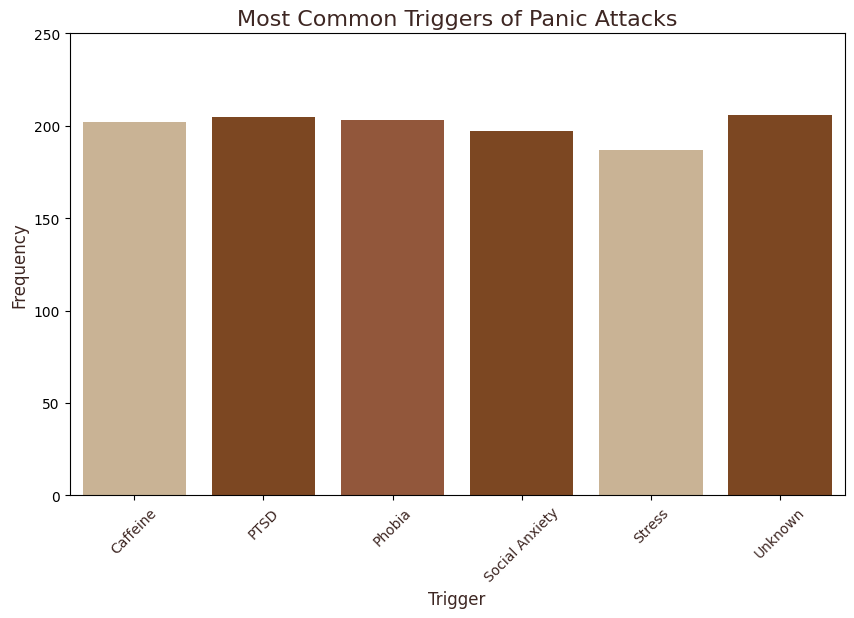

In [105]:
# Ensuring coluns names were clear
df.columns = df.columns.str.strip()

# Count occurrences of each trigger in the 'trigger' column
trigger_counts = df['trigger'].value_counts()

# Dadding the clours ive used
brown_shades = ["#D2B48C", "#8B4513", "#A0522D", "#8B4513"]

# Define the custom labels for the x-axis
custom_labels = ['Caffeine', 'PTSD', 'Phobia', 'Social Anxiety', 'Stress', 'Unknown']

# Create a figure with a translucent background
plt.figure(figsize=(10, 6), facecolor=(1, 1, 1, 0.1))

# Creating the bar plot with shading 
sns.barplot(x=trigger_counts.index, y=trigger_counts.values, palette=brown_shades)
# Naming x asis 
plt.xticks(ticks=range(len(custom_labels)), labels=custom_labels, rotation=45, fontsize=10, color='#3E2723')

#Here i add the title
plt.title('Most Common Triggers of Panic Attacks', fontsize=16, color='#3E2723')
plt.xlabel('Trigger', fontsize=12, color='#3E2723')
plt.ylabel('Frequency', fontsize=12, color='#3E2723')

# Set the y-axis limit to ensure the frequency goes up to 250
plt.ylim(0, 250)

# Make the background of the plot area translucent
plt.gca().set_facecolor((1, 1, 1, 0.1))  # translucent plot background

# Show the plot
plt.show()


/tmp/ipykernel_32/2863993394.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=smoking_panic.index, y=smoking_panic.values, palette=["#A0522D", "#8B4513"])  # Brown tones for bars


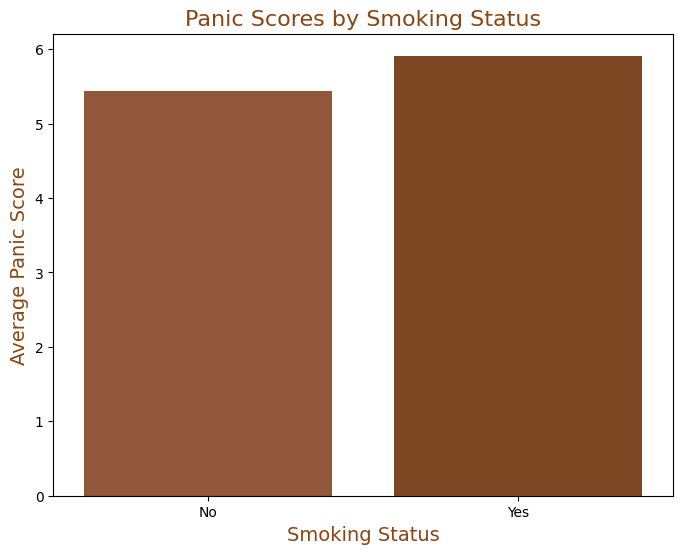

In [107]:
#getting the smoking group and calculating score
smoking_panic = df.groupby('smoking')['panic_score'].mean()
#Creating the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=smoking_panic.index, y=smoking_panic.values, palette=["#A0522D", "#8B4513"])
#Naming an colouring the chart
plt.title('Panic Scores by Smoking Status', fontsize=16, color='#8B4513')
plt.xlabel('Smoking Status', fontsize=14, color='#8B4513')
plt.ylabel('Average Panic Score', fontsize=14, color='#8B4513')
plt.gca().patch.set_facecolor((1, 1, 1, 0.5))
